# 1. Generating the Data set

In [4]:
import pandas as pd
import numpy as np
import random

# Soil textures and other parameters
soil_textures = ['Clay', 'Loamy']

# Expanded list of crops grown in Kenya
crop_list = [
    'Maize',
    'Beans',
    'Rice',
    'Sorghum',
    'Potatoes',
    'Tomatoes',
    'Sweet Potatoes',
    'Coffee',
    'Tea',
    'Cabbages',
    'Carrots',
    'Avocados',
    'Groundnuts (Peanuts)',
    'Onions',
    'Bananas',
    'Cassava',
    'Chili Peppers',
    'Pineapples',
    'Pigeon Peas',
    'Watermelon',
    'Mangoes',
    'Tropical Fruits (Papaya, Guava, etc.)',
    'Cucumbers',
    'Pumpkins',
    'Lettuce',
    'Spinach',
    'Zucchini',
    'Eggplant (Brinjal)',
    'Bitter Kola',
    'Okra (Lady\'s Finger)'
]

# Define planting_windows in the global scope
planting_windows = {
    'Maize': {'start': 3, 'end': 5},  # March-May
    'Beans': {'start': 8, 'end': 10}, # August-October
    'Rice': {'start': 4, 'end': 6},   # April-June
    'Sorghum': {'start': 3, 'end': 5},
    'Potatoes': {'start': 2, 'end': 4},
    'Tomatoes': {'start': 7, 'end': 9},
    'Sweet Potatoes': {'start': 9, 'end': 11},
    'Zucchini': {'start': 9, 'end': 11},
    'Cabbages': {'start': 6, 'end': 9},
    'Carrots': {'start': 6, 'end': 8},
    'Avocados': {'start': 5, 'end': 9},
    'Onions': {'start': 7, 'end': 9},
    'Bananas': {'start': 1, 'end': 12},
    'Chili Peppers': {'start': 8, 'end': 10},
    'Pineapples': {'start': 1, 'end': 12},
    'Watermelon': {'start': 9, 'end': 11},
    'Mangoes': {'start': 10, 'end': 12},
    'Tropical Fruits (Papaya, Guava, etc.)': {'start': 1, 'end': 12},
    'Cucumbers': {'start': 8, 'end': 10},
    'Pumpkins': {'start': 7, 'end': 9},
    'Lettuce': {'start': 5, 'end':  7},
    'Spinach': {'start': 5, 'end': 7},
    'Eggplant (Brinjal)': {'start': 8, 'end': 10},
    'Okra (Lady\'s Finger)': {'start': 7, 'end': 9},
}

# Helper function to predict water management strategies
def predict_water_management(soil_texture, rainfall_confidence, growth_stage):
    if soil_texture == 'Loamy' and rainfall_confidence < 50:
        return 'Implement drip irrigation and monitor water levels.'
    elif soil_texture == 'Clay' and rainfall_confidence > 70:
        return 'Natural moisture retention is sufficient; monitor conditions.'
    elif growth_stage in ['Vegetative']:
        return 'Frequent irrigation required for seedling establishment.'
    elif growth_stage in ['Mature']:
        return 'Maintain steady moisture levels to support final crop development.'
    return 'Regular irrigation recommended based on current conditions.'

# Function to predict crop to plant based on soil pH, texture, previous crop, and yield
def predict_crop_to_plant(is_previous_crop, soil_ph, soil_texture, yield_previous_crop):
    crop_scores = {}

    for crop in crop_list:
        score = 0

        # Soil pH criteria
        if crop in ['Maize', 'Sorghum', 'Rice'] and soil_ph >= 6.0:
            score += 1
        elif crop in ['Beans', 'Groundnuts (Peanuts)', 'Pigeon Peas'] and soil_ph >= 5.5:
            score += 1
        elif crop in ['Potatoes', 'Sweet Potatoes', 'Cassava'] and soil_ph >= 5.5:
            score += 1

        # Previous crop influence
        if is_previous_crop in ['Beans', 'Groundnuts (Peanuts)', 'Pigeon Peas'] and crop in ['Maize', 'Sorghum']:
            score += 1
        elif is_previous_crop in ['Maize', 'Rice', 'Sorghum'] and crop in ['Potatoes', 'Sweet Potatoes']:
            score += 1

        # Yield influence
        if yield_previous_crop > 2000:  # High yield from previous crop
            score += 1

        # Soil texture influence
        if soil_texture == 'Loamy' and crop in ['Sorghum', 'Beans']:
            score += 1
        elif soil_texture == 'Clay' and crop in ['Rice', 'Potatoes']:
            score += 1

        crop_scores[crop] = score  # Corrected the key to 'crop'

    crop_to_plant = max(crop_scores, key=crop_scores.get)
    return crop_to_plant

# Function to predict pest control recommendations based on wind speed, humidity, and growth stage
def predict_pest_control(growth_stage, humidity, wind_speed):
    if growth_stage in ['Vegetative']:
        if humidity > 70:
            return 'High risk of pests; consider organic options and monitor closely.'
        elif wind_speed > 5:  # High wind speed can deter pests
            return 'Windy conditions; monitor for pests but spraying may be less effective.'
        else:
            return 'Optimal time to spray; consider preventive measures.'

    elif growth_stage == 'Mature':
        return 'Regularly monitor pest populations; maintain good crop health.'

    return 'Not advisable to spray; conditions are not favorable for pest activity.'

# Function to predict optimal planting time based on crop type, growth time, and rainfall confidence
def predict_optimal_planting_time(is_crop, rainfall_confidence, is_planting_month):
    crop_window = planting_windows.get(is_crop, {'start': 1, 'end': 12})  # Default to year-round

    if crop_window['start'] <= is_planting_month <= crop_window['end']:
        if rainfall_confidence > 70:
            return 'Plant immediately.'
        elif rainfall_confidence > 50:
            return random.choice(['Delay planting for a week.', 'Delay planting for two weeks.'])
        else:
            return random.choice(['Delay planting for at least a month.', 'Consider planting a different crop.'])
    else:
        # Adjust the logic to make "Not optimal for planting" less frequent
        if random.random() < 0.3:  # 30% chance to suggest waiting
            return 'Not optimal for planting; consider waiting for the right season.'
        else:
            return random.choice(['Plant immediately if conditions allow.', 'Consider planting a different crop.'])

# Generate synthetic data with predictions
data = []

for _ in range(1500):  # generate 1500 rows of data
    soil_ph = round(random.uniform(5.0, 7.0), 1)
    rainfall_confidence = random.randint(0, 100)  # Confidence level between 0% and 100%
    soil_texture = random.choice(soil_textures)

    wind_speed = round(random.uniform(0, 10), 2)  # m/s
    humidity = round(random.uniform(30, 100), 2)  # %
    is_previous_crop = random.choice(crop_list)  # Randomly select a previous crop
    is_crop = random.choice([crop for crop in crop_list if crop != is_previous_crop])  # Ensure diversity
    yield_previous_crop = round(random.uniform(0, 5000), 2)  # kg/ha

    growth_stage = random.choice(['Vegetative', 'Mature'])
    is_planting_month = random.randint(1, 12)  # Randomly select a month from 1 to 12

    # Get correct planting window
    crop_window = planting_windows.get(is_crop, {'start': 1, 'end': 12})

    # Predict crop to plant
    crop_to_plant = predict_crop_to_plant(is_previous_crop, soil_ph, soil_texture, yield_previous_crop)

    # Predict water management strategy
    water_management = predict_water_management(soil_texture, rainfall_confidence, growth_stage)

    # Get a single pest control recommendation
    pest_control_recommendation = predict_pest_control(growth_stage, humidity, wind_speed)

    # Predict Optimal Planting Date
    optimal_planting_time = predict_optimal_planting_time(is_crop, rainfall_confidence, is_planting_month)

    # Append the generated data to the list
    data.append({
        'Soil pH': soil_ph,
        'Soil Texture': soil_texture,
        'Wind Speed (m/s)': wind_speed,
        'Humidity (%)': humidity,
        'Is Crop': is_crop,
        'Start': crop_window['start'],
        'End': crop_window['end'],
        'Is Previous Crop': is_previous_crop,
        'Yield of Previous Crop (kg/ha)': yield_previous_crop,
        'Crop Growth Stage': growth_stage,
        'Rainfall Confidence (%)': rainfall_confidence,
        'Is Planting Month': is_planting_month,
        'Crop to Plant': crop_to_plant,
        'Water Management': water_management,
        'Pest Control Recommendation': pest_control_recommendation,
        'Optimal Planting Time': optimal_planting_time
    })

# Create a DataFrame from the generated data
df = pd.DataFrame(data)

# Rearranging the columns as per the new order
df = df[['Soil pH', 'Soil Texture',
         'Wind Speed (m/s)', 'Humidity (%)','Is Crop', 'Start', 'End',
         'Is Previous Crop', 'Yield of Previous Crop (kg/ha)',
         'Crop Growth Stage', 'Rainfall Confidence (%)', 'Is Planting Month',
         'Crop to Plant', 'Water Management',
         'Pest Control Recommendation', 'Optimal Planting Time']]

# Display the first few rows of the DataFrame
print(df.head())

# Display the DataFrame summary
print(df.describe())

# Save the DataFrame to a CSV file
df.to_csv('precision_farming_refined.csv', index=False)

   Soil pH Soil Texture  Wind Speed (m/s)  Humidity (%)        Is Crop  Start  \
0      5.1        Loamy              7.74         52.46       Potatoes      2   
1      6.3        Loamy              7.32         33.04        Bananas      1   
2      5.4         Clay              2.65         68.24  Chili Peppers      8   
3      5.9         Clay              1.13         52.74       Cabbages      6   
4      6.0        Loamy              6.51         97.77        Spinach      5   

   End Is Previous Crop  Yield of Previous Crop (kg/ha) Crop Growth Stage  \
0    4            Maize                          742.19            Mature   
1   12         Tomatoes                         4736.03            Mature   
2   10          Cassava                         2133.81            Mature   
3    9            Maize                         4452.02            Mature   
4    7          Cassava                         1070.61            Mature   

   Rainfall Confidence (%)  Is Planting Month Crop

Visualizing The Data set

Dataset Overview:
   Soil pH Soil Texture  Wind Speed (m/s)  Humidity (%)        Is Crop  Start  \
0      6.1        Loamy              7.49         67.17  Chili Peppers      8   
1      5.8         Clay              3.04         66.90    Pigeon Peas      1   
2      5.0         Clay              5.13         48.38        Mangoes     10   
3      6.7         Clay              3.37         99.73        Bananas      1   
4      5.5         Clay              6.78         32.60       Avocados      5   

   End      Is Previous Crop  Yield of Previous Crop (kg/ha)  \
0   10               Lettuce                         2639.75   
1   12    Eggplant (Brinjal)                          320.40   
2   12              Tomatoes                         4502.41   
3   12                 Beans                          364.28   
4    9  Groundnuts (Peanuts)                         1900.30   

  Crop Growth Stage  Rainfall Confidence (%)  Is Planting Month Crop to Plant  \
0            Mature          

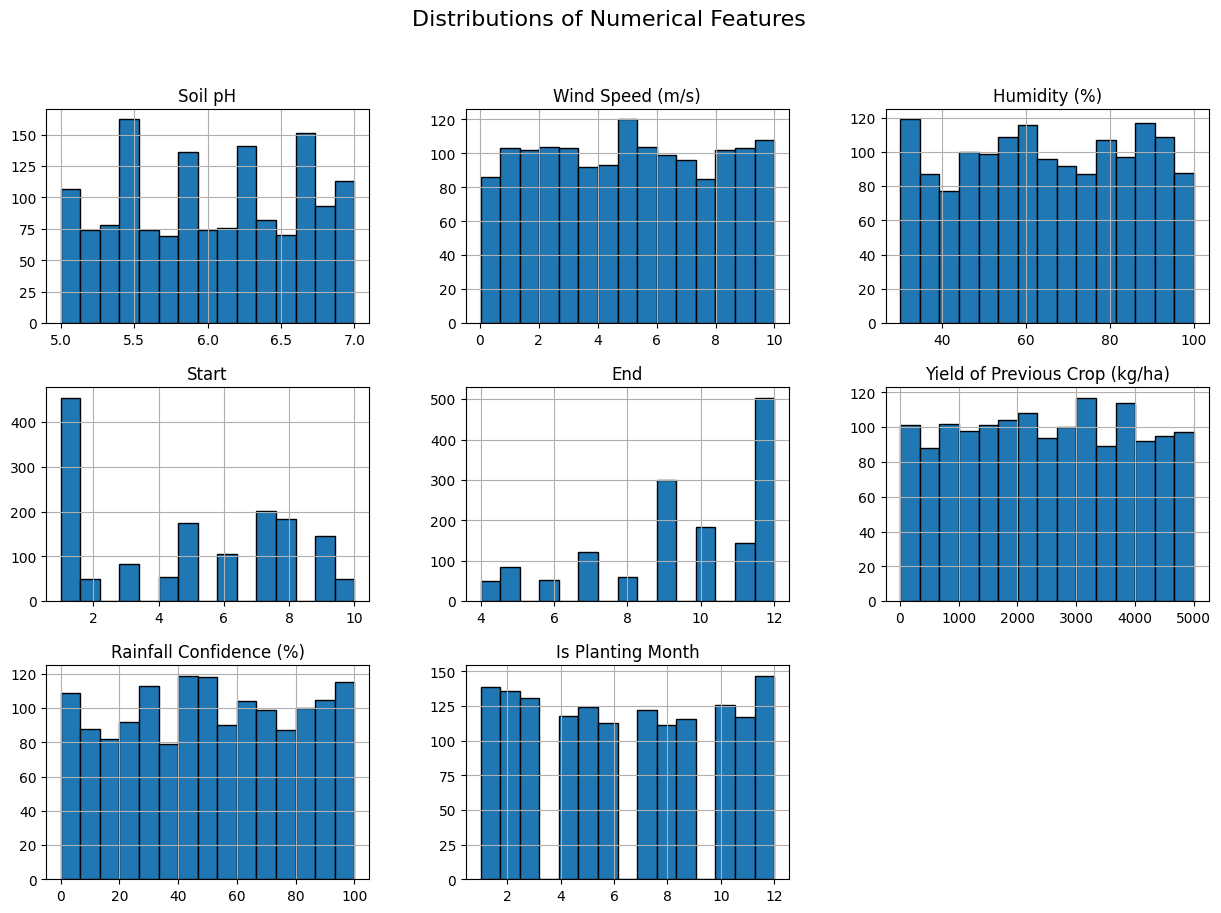

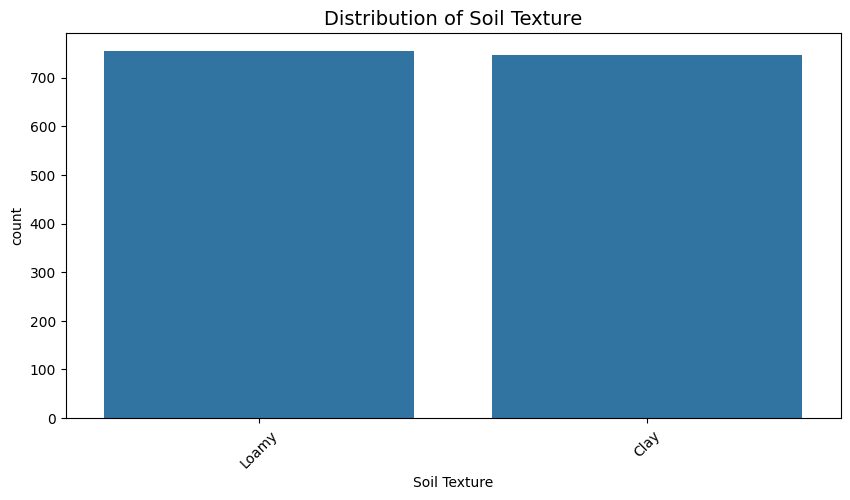

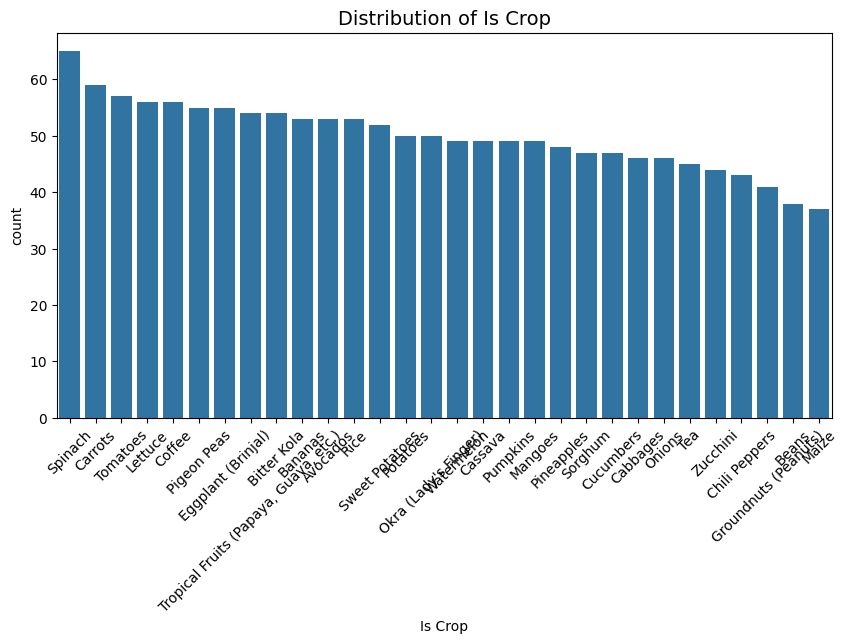

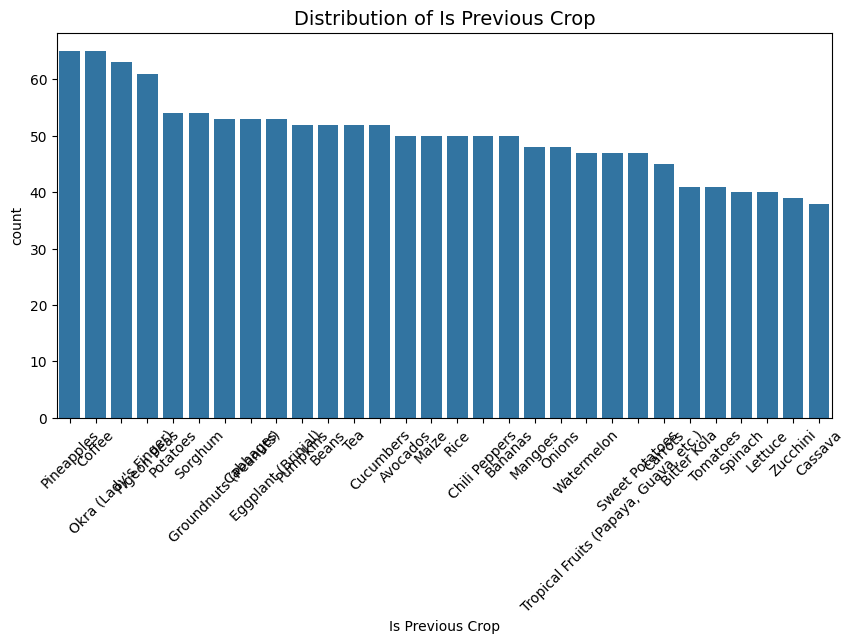

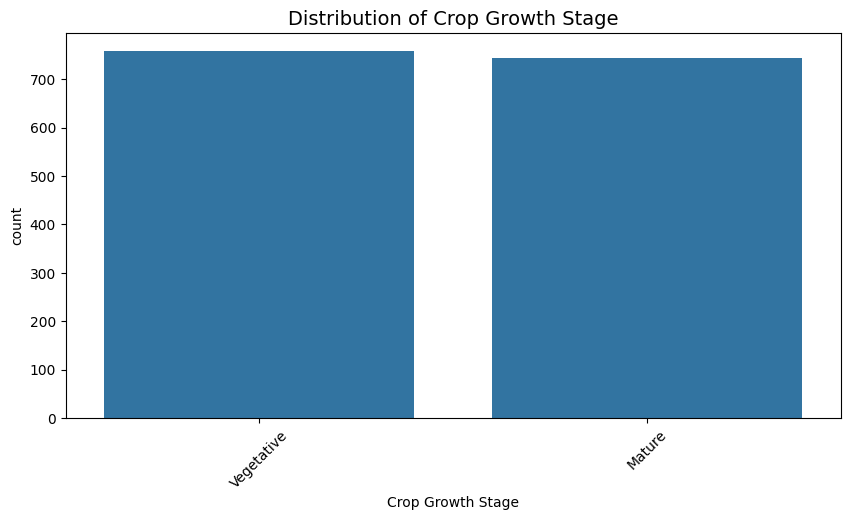

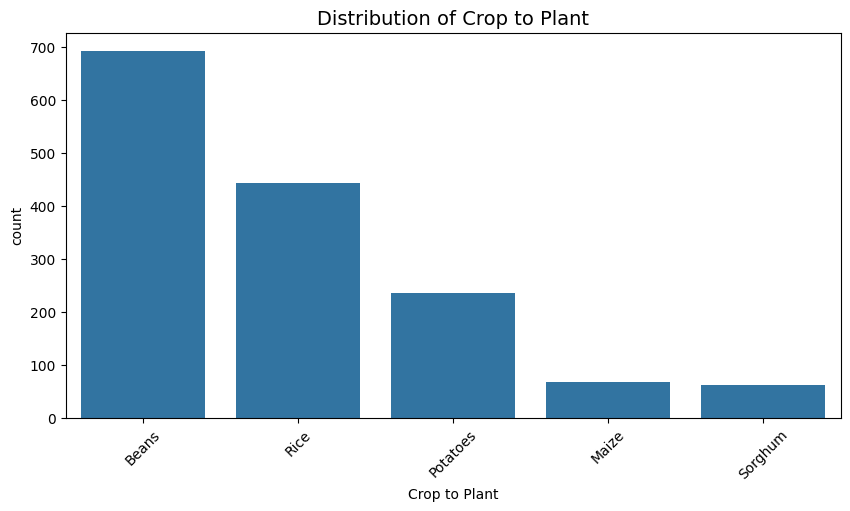

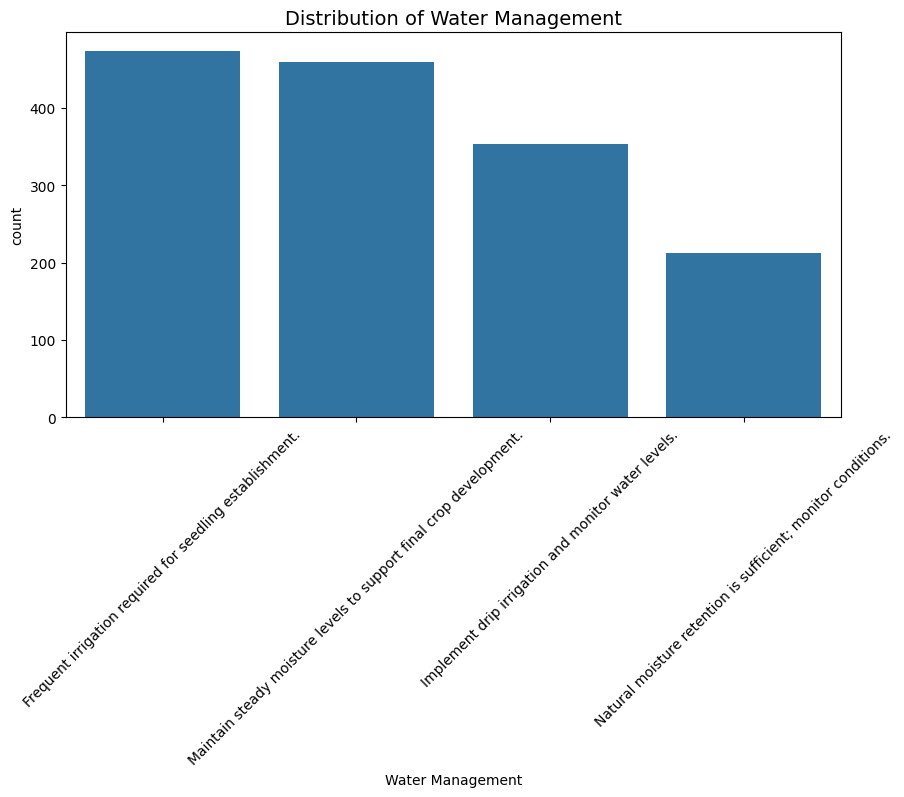

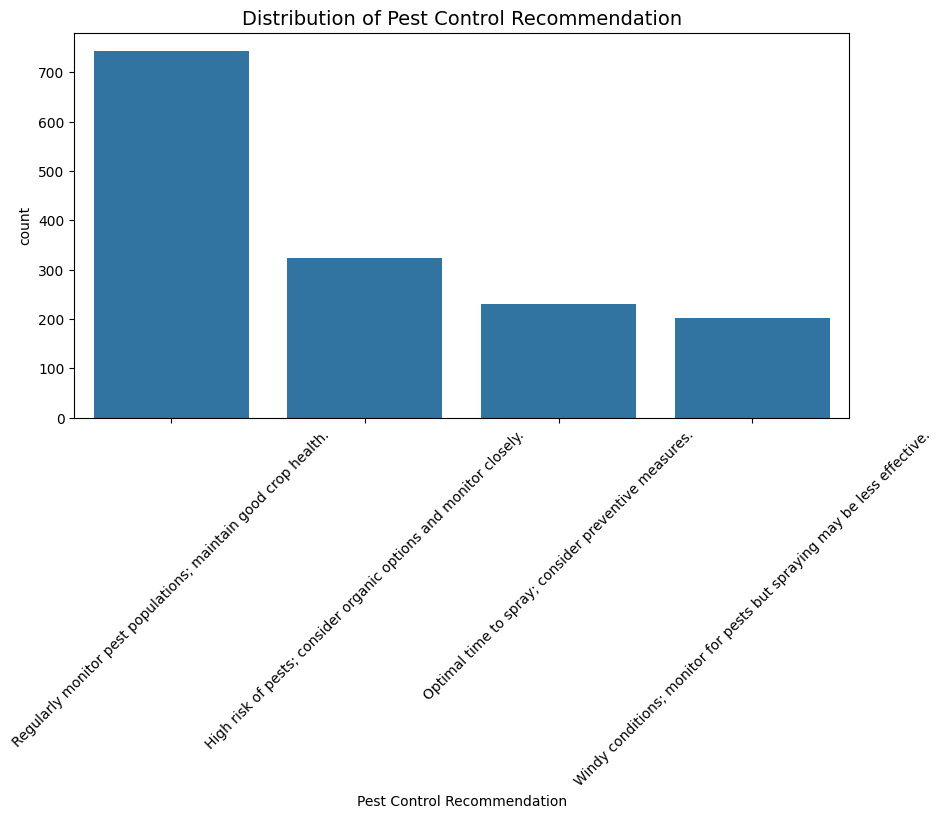

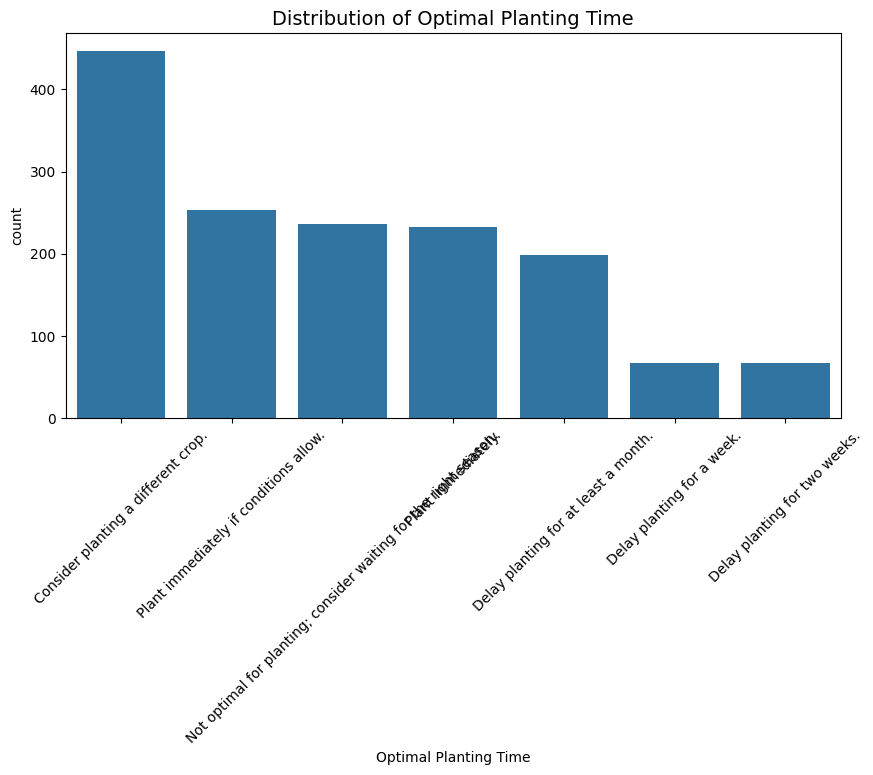

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
file_path = "precision_farming_refined.csv"  # Replace with your uploaded file path
data = pd.read_csv(file_path)

# Step 2: Display dataset structure
print("Dataset Overview:")
print(data.head())
print("\nColumn Data Types:")
print(data.dtypes)
print("\nMissing Values:")
print(data.isnull().sum())

# Step 3: Basic statistics for numerical and categorical data
print("\nBasic Statistics for Numerical Features:")
print(data.describe())

print("\nValue Counts for Categorical Features:")
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col} Value Counts:")
    print(data[col].value_counts())

# Step 4: Data Visualization
# Visualizing Numerical Features
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols].hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle("Distributions of Numerical Features", fontsize=16)
plt.show()

# Visualizing Categorical Features
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xticks(rotation=45)
    plt.show()


Understanding the Nature of the features-Categorical or numerical

In [ ]:
import pandas as pd

# Load the dataset (replace 'your_dataset.csv' with actual file path)
df = pd.read_csv('precision_farming_refined.csv')

# Display the first few rows
print(df.head())

# Check column data types and missing values
print(df.info())
print(df.isnull().sum())  # Count missing values per column


   Soil pH Soil Texture  Wind Speed (m/s)  Humidity (%)  \
0      5.6        Loamy              4.96         92.73   
1      6.8        Loamy              1.29         53.77   
2      6.1         Clay              8.12         38.56   
3      6.9        Loamy              4.98         43.57   
4      5.6         Clay              5.22         79.34   

                                 Is Crop  Start  End Is Previous Crop  \
0                                Bananas      1   12         Tomatoes   
1                   Okra (Lady's Finger)      7    9   Sweet Potatoes   
2                                Lettuce      5    7       Watermelon   
3  Tropical Fruits (Papaya, Guava, etc.)      1   12          Bananas   
4  Tropical Fruits (Papaya, Guava, etc.)      1   12        Cucumbers   

   Yield of Previous Crop (kg/ha) Crop Growth Stage  Rainfall Confidence (%)  \
0                         4626.40        Vegetative                       36   
1                         2009.56        Veget

# 2. Encoding the Dataset

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('precision_farming_refined.csv')

# Define the crop list
crop_list = [
    'Maize', 'Beans', 'Rice', 'Sorghum', 'Potatoes', 'Tomatoes', 'Sweet Potatoes', 'Coffee', 'Tea', 'Cabbages',
    'Carrots', 'Avocados', 'Groundnuts (Peanuts)', 'Onions', 'Bananas', 'Cassava', 'Chili Peppers', 'Pineapples',
    'Pigeon Peas', 'Watermelon', 'Mangoes', 'Tropical Fruits (Papaya, Guava, etc.)', 'Cucumbers', 'Pumpkins',
    'Lettuce', 'Spinach', 'Zucchini', 'Eggplant (Brinjal)', 'Bitter Kola', 'Okra (Lady\'s Finger)'
]

# Initialize LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(crop_list)  # Fit the encoder with the predefined crop list

# Encode 'Is Crop' column
df['Is Crop'] = label_encoder.transform(df['Is Crop'])

# Display the mapping
crop_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Crop Mapping:", crop_mapping)


# 1️⃣ Encode Soil pH: If > 6.0 → 1, Else → 0
df['Soil pH'] = (df['Soil pH'] > 6.0).astype(int)

# 2️⃣ Encode Soil Texture: Loamy → 1, Clay → 0, Others → -1
df['Soil Texture'] = df['Soil Texture'].map({'Loamy': 1, 'Clay': 0}).fillna(-1)

# 3️⃣ Encode Wind Speed: (0 if 5 < wind_speed < 10, 1 if wind_speed < 5, -1 otherwise)
df['Wind Speed (m/s)'] = df['Wind Speed (m/s)'].apply(lambda x: 0 if 5 < x < 10 else (1 if x < 5 else -1))

# 4️⃣ Encode Humidity: If > 70 → 1, Else → 0
df['Humidity (%)'] = (df['Humidity (%)'] > 60).astype(int)

# 5️⃣ Encode Presence of Previous Crop
# If there's any previous crop recorded, mark as 1, else 0
df['Is Previous Crop'] = df['Is Previous Crop'].notna().astype(int)

# 6️⃣ Encode Yield of Previous Crop: If > 2000 → 1, Else → 0
df['Yield of Previous Crop (kg/ha)'] = (df['Yield of Previous Crop (kg/ha)'] > 2000).astype(int)

# 7️⃣ Encode Crop Growth Stage: Vegetative → 1, Mature → 0, Others → -1
df['Crop Growth Stage'] = df['Crop Growth Stage'].map({'Vegetative': 1, 'Mature': 0}).fillna(-1)

# 8️⃣ Encode Rainfall Confidence: If > 70 → 1, Else → 0
df['Rainfall Confidence (%)'] = (df['Rainfall Confidence (%)'] > 50).astype(int)

# 9️⃣ Encode Planting Month
df['Is Planting Month'] = ((df['Is Planting Month'] >= df['Start']) &
                           (df['Is Planting Month'] <= df['End'])).astype(int)

# 🔹 New dynamic logic for 'Crop to Plant'
df['Crop to Plant'] = df.apply(lambda row: (row['Is Previous Crop'] +
                                            row['Soil pH'] +
                                            row['Soil Texture'] +
                                            row['Yield of Previous Crop (kg/ha)']) >= 2, axis=1).astype(int)


# 1️⃣1️⃣ Predict Water Management
df['Water Management'] = df.apply(lambda row: (row['Soil Texture'] +
                                               row['Rainfall Confidence (%)'] +
                                               row['Crop Growth Stage'] +
                                               row['Humidity (%)']) >= 2, axis=1).astype(int)


# 1️⃣2️⃣ Predict Pest Control Recommendation
df['Pest Control Recommendation'] = df.apply(lambda row: 1 if sum([
                                               row['Crop Growth Stage'] == 1,
                                               row['Humidity (%)'] == 1,
                                               row['Yield of Previous Crop (kg/ha)'] == 1,
                                               row['Wind Speed (m/s)'] == 1
                                               ]) >= 2 else 0, axis=1)



# 1️⃣3️⃣ Predict Optimal Planting Time using 'Is Planting Window'
df['Optimal Planting Time'] = df.apply(lambda row: 1 if sum([
                                               row['Is Planting Month'] == 1,
                                               row['Rainfall Confidence (%)'] == 1,
                                               row['Humidity (%)'] == 1
                                               ]) >= 2 else 0, axis=1)


# Move specific columns to the end
target_columns = ['Crop to Plant', 'Water Management', 'Pest Control Recommendation', 'Optimal Planting Time']
df = df[[col for col in df.columns if col not in target_columns] + target_columns]

# Save the processed dataset
df.to_csv('Encoded_Precision_Farming.csv', index=False)

print("✅ Encoding and predictions complete. Processed dataset saved as 'Encoded_Precision_Farming.csv'.")


Crop Mapping: {'Avocados': 0, 'Bananas': 1, 'Beans': 2, 'Bitter Kola': 3, 'Cabbages': 4, 'Carrots': 5, 'Cassava': 6, 'Chili Peppers': 7, 'Coffee': 8, 'Cucumbers': 9, 'Eggplant (Brinjal)': 10, 'Groundnuts (Peanuts)': 11, 'Lettuce': 12, 'Maize': 13, 'Mangoes': 14, "Okra (Lady's Finger)": 15, 'Onions': 16, 'Pigeon Peas': 17, 'Pineapples': 18, 'Potatoes': 19, 'Pumpkins': 20, 'Rice': 21, 'Sorghum': 22, 'Spinach': 23, 'Sweet Potatoes': 24, 'Tea': 25, 'Tomatoes': 26, 'Tropical Fruits (Papaya, Guava, etc.)': 27, 'Watermelon': 28, 'Zucchini': 29}
✅ Encoding and predictions complete. Processed dataset saved as 'Encoded_Precision_Farming.csv'.


 Correlation Heatmap (Feature Relationships) visualisation

In [28]:
print(df['Optimal Planting Time'].value_counts())


Optimal Planting Time
1    787
0    713
Name: count, dtype: int64


## 3. Feature selection

In [30]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Load the encoded dataset
df = pd.read_csv('Encoded_Precision_Farming.csv')

# Separate features and target variables
target_columns = ['Crop to Plant', 'Water Management', 'Pest Control Recommendation', 'Optimal Planting Time']
X = df.drop(columns=target_columns)  # Features
y = df['Optimal Planting Time']  # Target for feature importance

# 1️⃣ **Variance Threshold: Remove Low-Variance Features**
var_thresh = VarianceThreshold(threshold=0.01)  # Removes features with variance < 0.01
X_var_filtered = var_thresh.fit_transform(X)
selected_features = X.columns[var_thresh.get_support()]

print(f"Features Remaining after Variance Threshold: {list(selected_features)}")

# 2️⃣ **Correlation Analysis: Remove Highly Correlated Features**
corr_matrix = pd.DataFrame(X_var_filtered, columns=selected_features).corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.85)]
X_corr_filtered = X_var_filtered[:, [i for i, col in enumerate(selected_features) if col not in high_corr_features]]

selected_features = [col for col in selected_features if col not in high_corr_features]
print(f"Features Remaining after Correlation Filtering: {selected_features}")

# 3️⃣ **Feature Importance using Random Forest**
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_corr_filtered)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_scaled, y)

feature_importances = pd.Series(rf_model.feature_importances_, index=selected_features).sort_values(ascending=False)
print("\n🔥 Top Important Features:")
print(feature_importances.head(10))

# Save the filtered dataset
df_filtered = df[selected_features + target_columns]
df_filtered.to_csv('Feature_Selected_Precision_Farming.csv', index=False)

print("✅ Feature selection complete. Processed dataset saved as 'Feature_Selected_Precision_Farming.csv'.")


Features Remaining after Variance Threshold: ['Soil pH', 'Soil Texture', 'Wind Speed (m/s)', 'Humidity (%)', 'Is Crop', 'Start', 'End', 'Yield of Previous Crop (kg/ha)', 'Crop Growth Stage', 'Rainfall Confidence (%)', 'Is Planting Month']
Features Remaining after Correlation Filtering: ['Soil pH', 'Soil Texture', 'Wind Speed (m/s)', 'Humidity (%)', 'Is Crop', 'Start', 'End', 'Yield of Previous Crop (kg/ha)', 'Crop Growth Stage', 'Rainfall Confidence (%)', 'Is Planting Month']

🔥 Top Important Features:
Rainfall Confidence (%)           0.327504
Humidity (%)                      0.292033
Is Planting Month                 0.236325
Start                             0.048551
End                               0.036260
Is Crop                           0.025084
Wind Speed (m/s)                  0.007380
Soil pH                           0.007225
Crop Growth Stage                 0.006761
Yield of Previous Crop (kg/ha)    0.006590
dtype: float64
✅ Feature selection complete. Processed dataset

## 4. Splitting Data

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the encoded dataset
df = pd.read_csv('Encoded_Precision_Farming.csv')

# Split into train (80%) and test (20%) sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

# Save the train and test datasets
train_df.to_csv('Train_Precision_Farming.csv', index=False)
test_df.to_csv('Test_Precision_Farming.csv', index=False)

print("✅ Dataset successfully split and saved.")
print(f"Train set size: {train_df.shape}, Test set size: {test_df.shape}")


✅ Dataset successfully split and saved.
Train set size: (1200, 16), Test set size: (300, 16)


## 5. Selection and Training

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# Load the training dataset
df = pd.read_csv('Train_Precision_Farming.csv')

# Define feature columns and target columns
target_columns = ['Crop to Plant', 'Water Management', 'Pest Control Recommendation', 'Optimal Planting Time']
feature_columns = [col for col in df.columns if col not in target_columns]

X = df[feature_columns]
y = df[target_columns[0]]  # Selecting 'Crop to Plant' as the primary target for feature selection

# 1️⃣ **Remove Highly Correlated Features**
correlation_matrix = X.corr()
high_corr_features = set()

# Identify features with correlation above 0.85
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.85:
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)

print(f"📌 Dropping highly correlated features: {high_corr_features}")
X = X.drop(columns=high_corr_features)

# 2️⃣ **Select Top Features Using SelectKBest**
kbest = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
X_kbest = kbest.fit_transform(X, y)

selected_features_kbest = X.columns[kbest.get_support()]
print("✅ Top features selected using SelectKBest:", selected_features_kbest.tolist())

# 3️⃣ **Feature Importance using RandomForest**
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("🔹 Feature Importance (RandomForest):")
print(feature_importance.head(10))

# 4️⃣ **Recursive Feature Elimination (RFE)**
rfe = RFE(rf_model, n_features_to_select=10)
rfe.fit(X, y)
selected_features_rfe = X.columns[rfe.support_]
print("✅ Top features selected using RFE:", selected_features_rfe.tolist())

# **Final Feature Selection**
final_features = list(set(selected_features_kbest) | set(selected_features_rfe))
X_selected = X[final_features]

# Save selected features
X_selected.to_csv('Selected_Features_Precision_Farming.csv', index=False)
print("✅ Feature selection complete! Saved selected features as 'Selected_Features_Precision_Farming.csv'.")


📌 Dropping highly correlated features: set()
✅ Top features selected using SelectKBest: ['Soil pH', 'Soil Texture', 'Wind Speed (m/s)', 'Humidity (%)', 'Is Crop', 'Start', 'End', 'Yield of Previous Crop (kg/ha)', 'Crop Growth Stage', 'Is Planting Month']
🔹 Feature Importance (RandomForest):
Yield of Previous Crop (kg/ha)    0.319742
Soil pH                           0.274720
Soil Texture                      0.265023
Is Crop                           0.048096
Start                             0.019243
End                               0.017022
Rainfall Confidence (%)           0.012684
Wind Speed (m/s)                  0.012178
Humidity (%)                      0.012157
Crop Growth Stage                 0.010491
dtype: float64


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


✅ Top features selected using RFE: ['Soil pH', 'Soil Texture', 'Wind Speed (m/s)', 'Humidity (%)', 'Is Crop', 'Start', 'End', 'Yield of Previous Crop (kg/ha)', 'Crop Growth Stage', 'Rainfall Confidence (%)']
✅ Feature selection complete! Saved selected features as 'Selected_Features_Precision_Farming.csv'.


## 6. Training and Evaluating

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

# Load the encoded dataset
df = pd.read_csv('Encoded_Precision_Farming.csv')

# Split into features and target columns
X = df.drop(columns=['Crop to Plant', 'Water Management', 'Pest Control Recommendation', 'Optimal Planting Time'])
y = df[['Crop to Plant', 'Water Management', 'Pest Control Recommendation', 'Optimal Planting Time']]

# Split into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Initialize the model (RandomForestClassifier for example)
rf_model = RandomForestClassifier(random_state=42)

# Wrap the model in MultiOutputClassifier
multi_target_model = MultiOutputClassifier(rf_model)

# Train the model
multi_target_model.fit(X_train, y_train)

# Evaluate the model
accuracy = multi_target_model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Save the model (optional, if you want to use it later)
import joblib
joblib.dump(multi_target_model, 'multi_target_model.pkl')

print("✅ Model training complete and saved.")


Model Accuracy: 100.00%
✅ Model training complete and saved.


In [12]:
import pandas as pd
import joblib
import numpy as np

# Load the pre-trained model (MultiOutputClassifier)
multi_target_model = joblib.load('multi_target_model.pkl')

# Create a new data entry (unseen data)
# Example values for the unseen data (adjust according to your feature structure)
new_data = {
    'Soil pH':[0],
        'Soil Texture':[0],
        'Wind Speed (m/s)':[1],
        'Humidity (%)':[0],
        'Is Crop':[0],
        'Start':[1],
        'End':[3],
        'Is Previous Crop':[1],
        'Yield of Previous Crop (kg/ha)':[0],
        'Crop Growth Stage':[0],
        'Rainfall Confidence (%)':[0],
        'Is Planting Month':[1]
}

# Convert the new data into a pandas DataFrame
new_data_df = pd.DataFrame(new_data)

# Use the model to make predictions
predictions = multi_target_model.predict(new_data_df)

# Display the predictions for the targets
target_names = ['Crop to Plant', 'Water Management', 'Pest Control Recommendation', 'Optimal Planting Time']
prediction_dict = dict(zip(target_names, predictions[0]))

print("Prediction Results for Unseen Data:")
for target, pred in prediction_dict.items():
    print(f"{target}: {pred}")


Prediction Results for Unseen Data:
Crop to Plant: 0
Water Management: 0
Pest Control Recommendation: 0
Optimal Planting Time: 0
